# Amazon Sales 

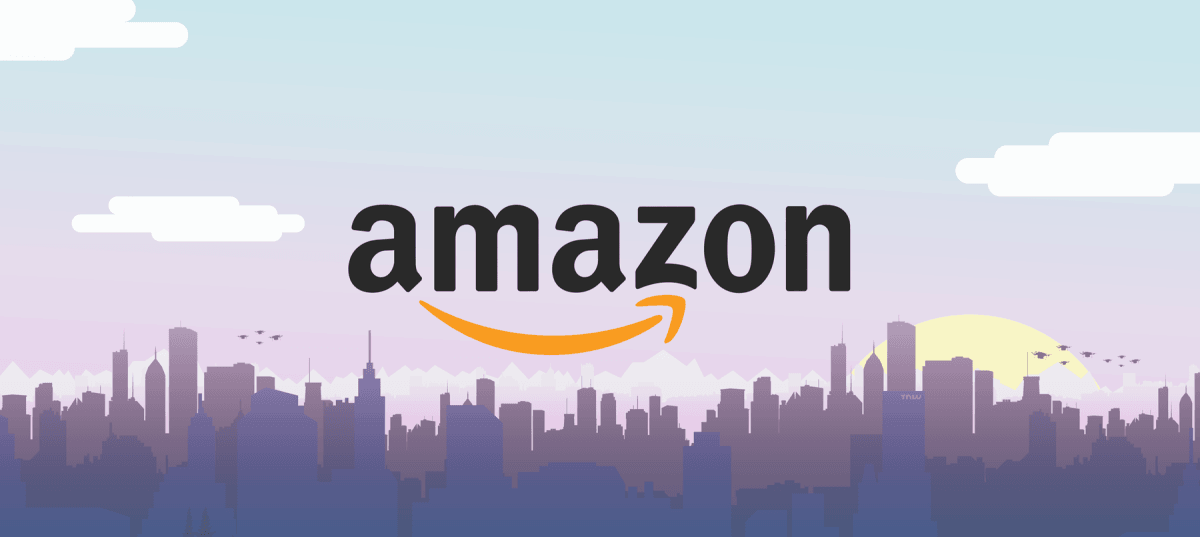

In [1]:
from IPython.display import Image
Image(filename='amazon_pic.png', width="800", height='50')

# Problem Statement

Sales management has gained importance to meet increasing competition and the
need for improved methods of distribution to reduce cost and to increase profits. Sales
management today is the most important function in a commercial and business
enterprise.

Do ETL: Extract-Transform-Load some Amazon dataset and find for me
Sales-trend -> month-wise, year-wise, yearly_month-wise

Find key metrics and factors and show the meaningful relationships between
attributes. Do your own research and come up with your findings.

## About Data

The dataset contains 100 entries with the following columns:

1. Region: Geographic region of the sale.
2. Country: Country where the sale occurred.
3. Item Type: Type of item sold.
4. Sales Channel: Whether the sale was online or offline.
5. Order Priority: Priority level of the order.
6. Order Date: Date the order was placed.
7. Order ID: Unique identifier for the order.
8. Ship Date: Date the order was shipped.
9. Units Sold: Number of units sold.
10. Unit Price: Price per unit.
11. Unit Cost: Cost per unit.
12. Total Revenue: Total revenue from the sale.
13. Total Cost: Total cost of the sale.
14. Total Profit: Total profit from the sale.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
import seaborn as sns

# Set the asthetic style of the plots
sns.set_style("whitegrid")

## Loading and Previewing Data

In [2]:
data = pd.read_csv("Amazon Sales data.csv")
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [4]:
data.shape

(100, 14)

In [5]:
data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


### Checking Missing Values

In [6]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [7]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [8]:
# Convert 'Order Date' and 'Ship Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Extract year and month from 'Order Date'
data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month

# Summarize sales data by year
yearly_sales = data.groupby('Order Year').agg({
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum',
    'Units Sold': 'sum'
}).reset_index()

# Summarize sales data by month
monthly_sales = data.groupby('Order Month').agg({
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum',
    'Units Sold': 'sum'
}).reset_index()


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
 14  Order Year      100 non-null    int32         
 15  Order M

In [10]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Year,Order Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


## Exploratory Data Analysis (EDA)

In [11]:
# Calculate the Number of Regions
data["Region"].nunique()

7

In [12]:
# Calculate the Number of Countries
data['Country'].nunique()

76

In [13]:
# Calculate the Items Type
data['Item Type'].nunique()

12

In [14]:
# Calculate the Total Unit Sold
print("Total Unit Sold" ,data['Units Sold'].sum())

Total Unit Sold 512871


In [15]:
# Calculate the Total Revenue
print("Total Revenue : ", data['Total Revenue'].sum())

Total Revenue :  137348768.31


In [16]:
# Calculate Total Cost
print("Total Cost : ", data['Total Cost'].sum())

Total Cost :  93180569.91000001


In [17]:
# Calculate Total Profit
print("Total Profit : ", data['Total Profit'].sum())

Total Profit :  44168198.39999999


In [18]:
# Showing the groupby regional sales
data.groupby(['Region', 'Sales Channel'])['Total Profit'].sum()

Region                             Sales Channel
Asia                               Offline          3584286.33
                                   Online           2529559.54
Australia and Oceania              Offline          1886283.82
                                   Online           2835876.21
Central America and the Caribbean  Offline          2475814.99
                                   Online            371092.86
Europe                             Offline          5574539.91
                                   Online           5508398.72
Middle East and North Africa       Offline          2169081.08
                                   Online           3592110.78
North America                      Offline          1457942.76
Sub-Saharan Africa                 Offline          7772777.78
                                   Online           4410433.62
Name: Total Profit, dtype: float64

### Visaluaization of Key Trends

Text(0, 0.5, 'Total Revenue')

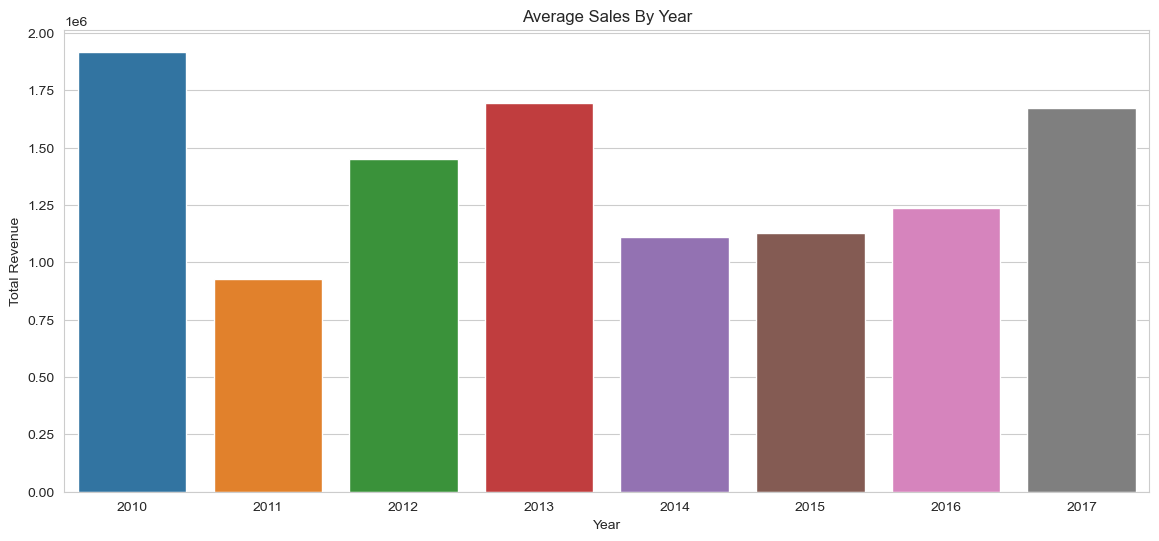

In [19]:
# Yearwise sales
year_sales = data.groupby('Order Year')['Total Revenue'].mean()
plt.figure(figsize = (14,6))
sns.barplot(x = year_sales.index, y = year_sales.values)
plt.title("Average Sales By Year")
plt.xlabel("Year")
plt.ylabel("Total Revenue")

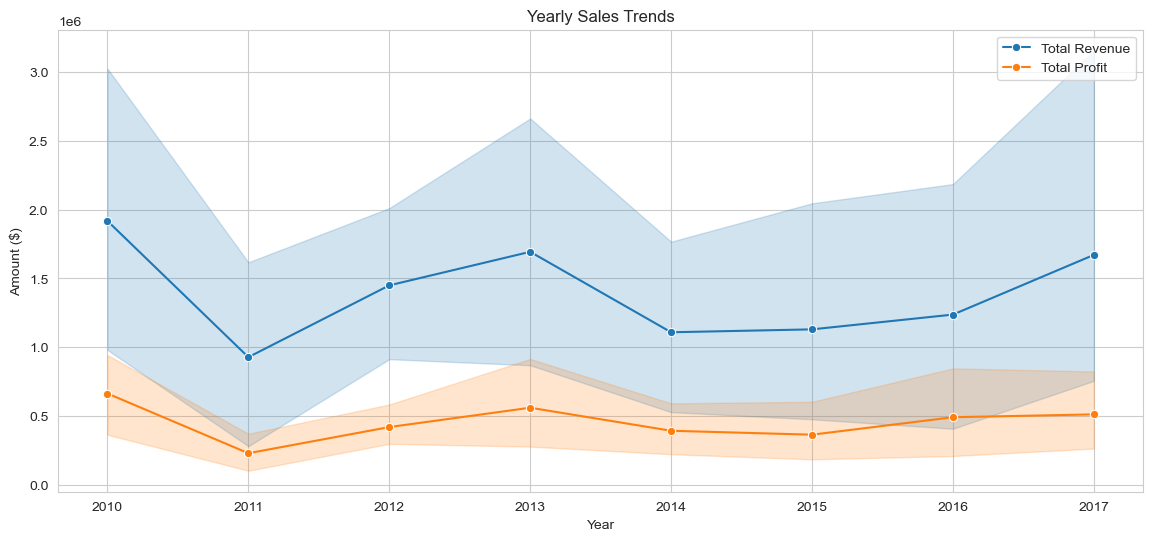

In [20]:
# Yearly Sales Trends
plt.figure(figsize=(14, 6))
plt.title("Yearly Sales Trends")
sns.lineplot(data=data, x='Order Year', y='Total Revenue', label='Total Revenue', marker='o')
sns.lineplot(data=data, x='Order Year', y='Total Profit', label='Total Profit', marker='o')
plt.xlabel("Year")
plt.ylabel("Amount ($)")
plt.legend()
plt.show()

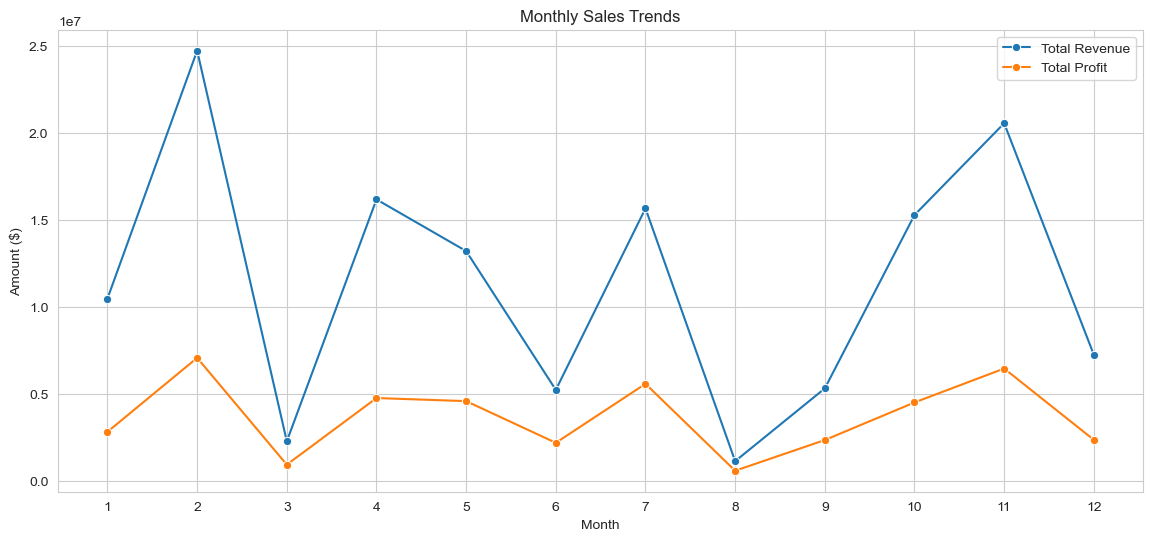

In [21]:
# Monthly Sales Trends
plt.figure(figsize=(14, 6))
plt.title("Monthly Sales Trends")
sns.lineplot(data=monthly_sales, x='Order Month', y='Total Revenue', label='Total Revenue', marker='o')
sns.lineplot(data=monthly_sales, x='Order Month', y='Total Profit', label='Total Profit', marker='o')
plt.xlabel("Month")
plt.ylabel("Amount ($)")
plt.xticks(range(1, 13))
plt.legend()
plt.show()

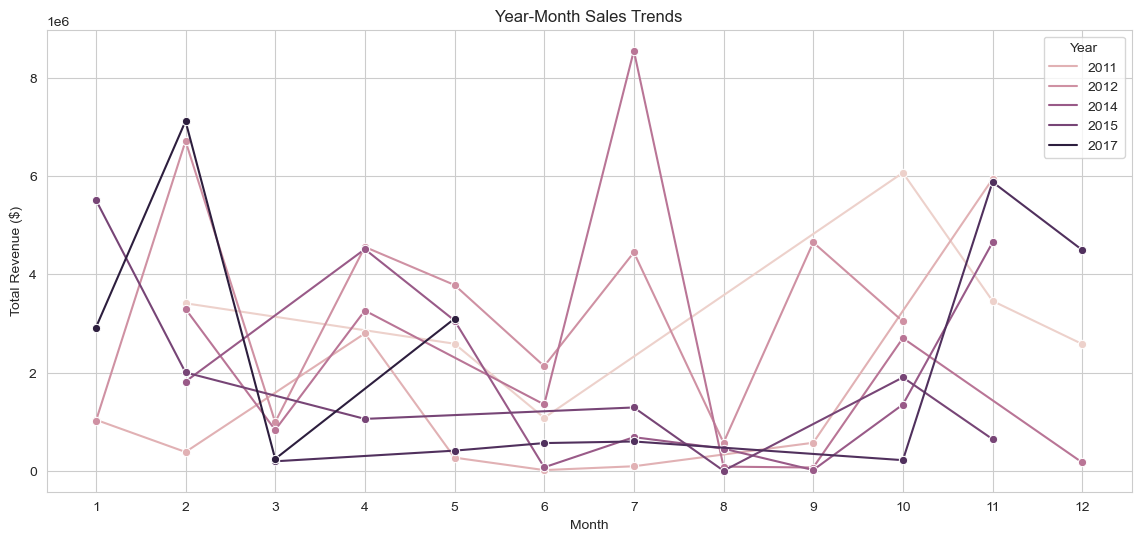

In [22]:
# Summarize sales data by year and month
year_month_sales = data.groupby(['Order Year', 'Order Month']).agg({
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum',
    'Units Sold': 'sum'
}).reset_index()

# Year-Month Sales Trends
plt.figure(figsize=(14, 6))
plt.title("Year-Month Sales Trends")
sns.lineplot(data=year_month_sales, x='Order Month', y='Total Revenue', hue='Order Year', marker='o')
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.show()

Text(0.5, 1.0, 'Average Profit in Region wise')

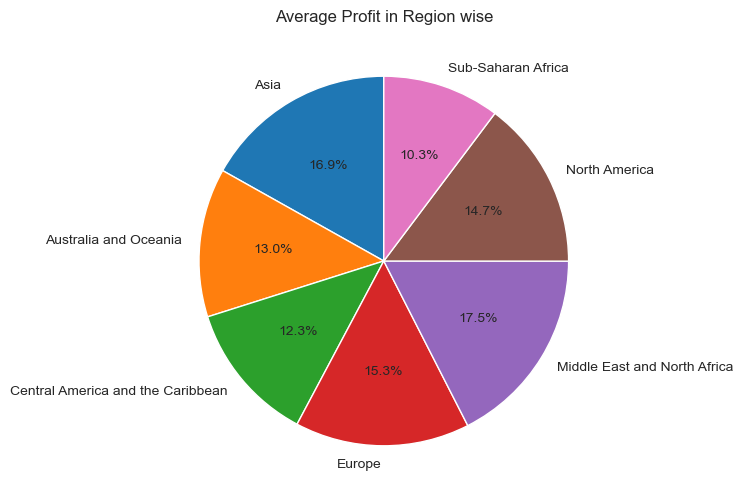

In [23]:
# Pie Chart of Total Profit in region wise
plt.figure(figsize = (6,6))
region_TotalRevenue = data.groupby("Region")['Total Profit'].mean()
plt.pie(region_TotalRevenue, startangle = 90, labels = region_TotalRevenue.index, autopct = '%1.1f%%')
plt.title("Average Profit in Region wise")

In [24]:
# Group Total Revenue by Item type
TotalRevenue_ItemType = data.groupby('Item Type')['Total Revenue'].sum()

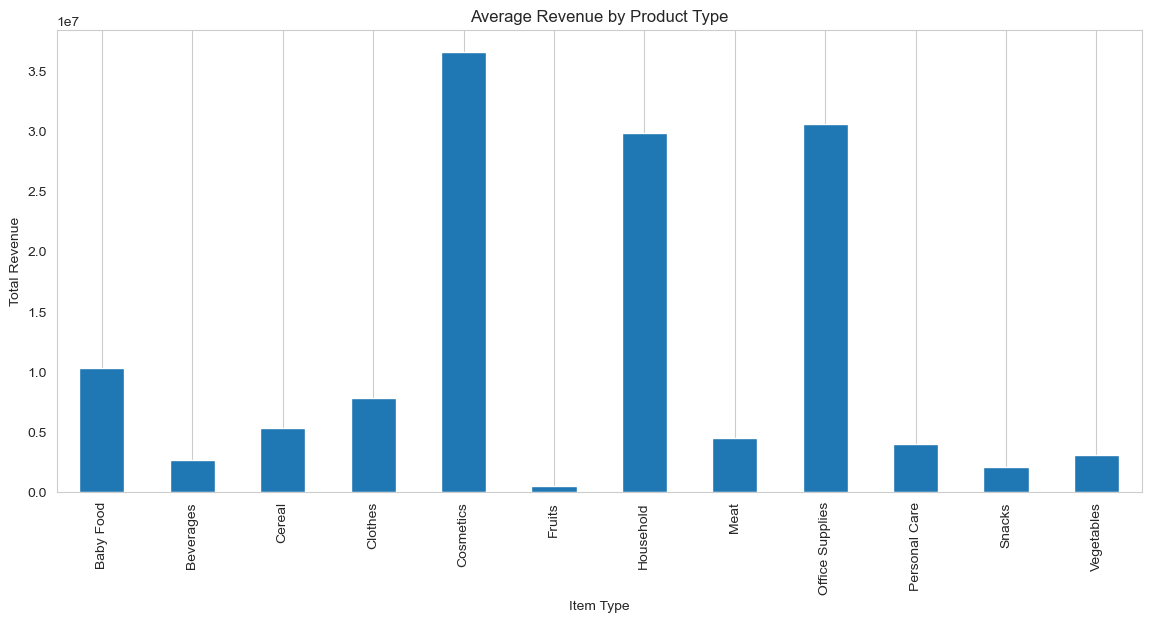

In [26]:
# Bar chat for total Revenue by item type
plt.figure(figsize = (14,6))
TotalRevenue_ItemType.plot(kind = 'bar')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.title("Average Revenue by Product Type")
plt.grid(axis ='y')
plt.show()

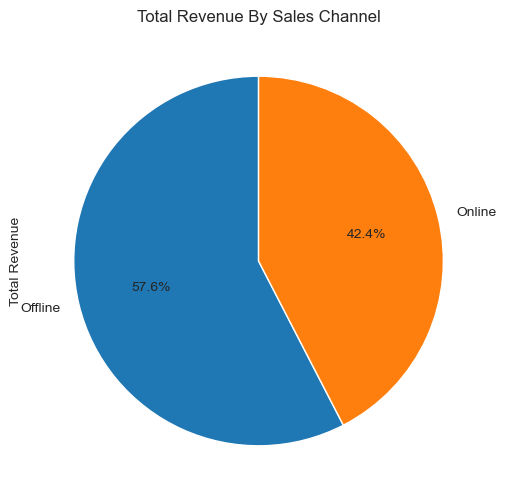

In [27]:
# Pie Chart for Total Revenue by Sales Channel
TotalRevenue_SalesChannel = data.groupby('Sales Channel')['Total Revenue'].mean()
plt.figure(figsize = (6,6))
TotalRevenue_SalesChannel.plot(kind = 'pie', startangle = 90, autopct='%1.1f%%')
plt.title("Total Revenue By Sales Channel")
plt.show()

<Axes: ylabel='Units Sold'>

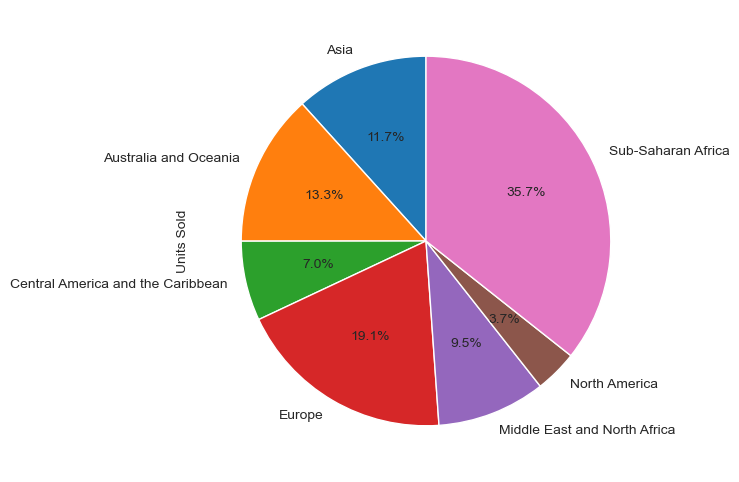

In [28]:
Region_UnitSold = data.groupby("Region")['Units Sold'].sum()
plt.figure(figsize=(6,6))
Region_UnitSold.plot(kind = 'pie', labels = Region_UnitSold.index, startangle = 90, autopct = '%1.1f%%')


<function matplotlib.pyplot.show(close=None, block=None)>

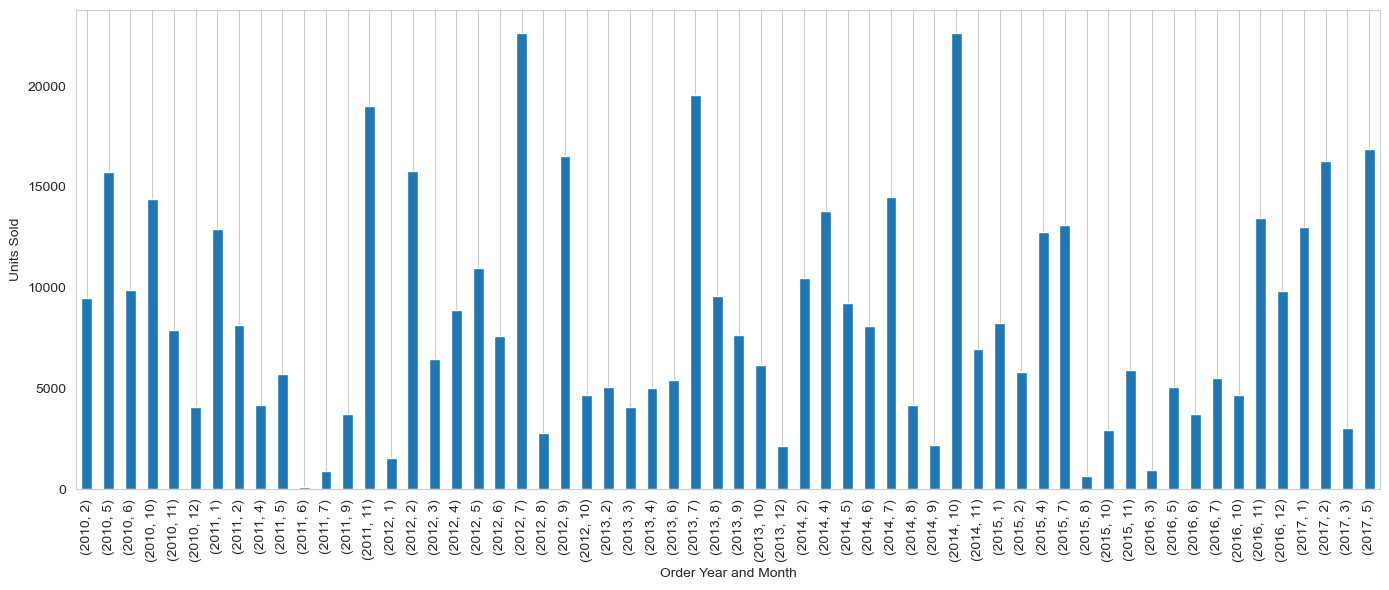

In [29]:
# Bar Chart for Units Sold by Year and Month
YearMonth_UnitsSold = data.groupby(['Order Year', 'Order Month'])['Units Sold'].sum()
plt.figure(figsize = (14,6))
YearMonth_UnitsSold.plot(kind= 'bar')
plt.xlabel("Order Year and Month")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.grid(axis = 'y')
plt.show

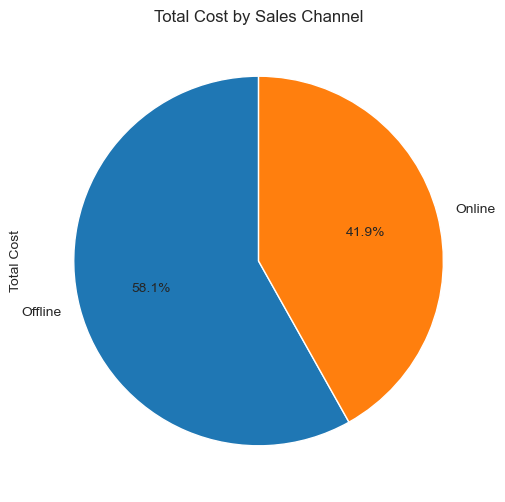

In [30]:
# Pie Chart for Total cost by Sales Channel
TotalCost_SalesChannel = data.groupby('Sales Channel')['Total Cost'].sum()
plt.figure(figsize = (6,6))
TotalCost_SalesChannel.plot(kind = 'pie', startangle = 90, autopct = '%1.1f%%')
plt.title("Total Cost by Sales Channel")
plt.show()

## Modelling Approach

16:33:36 - cmdstanpy - INFO - Chain [1] start processing
16:33:36 - cmdstanpy - INFO - Chain [1] done processing


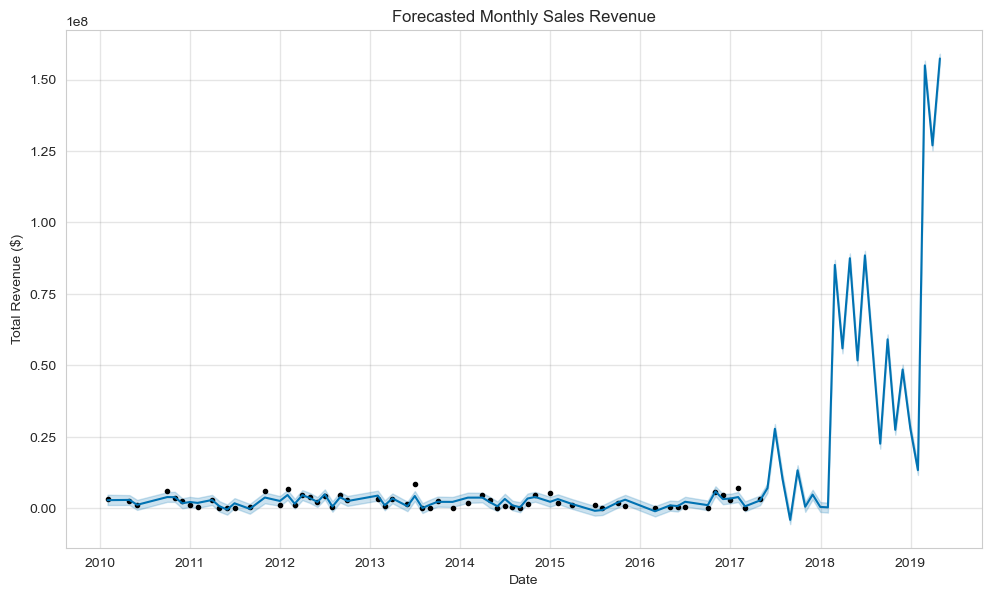

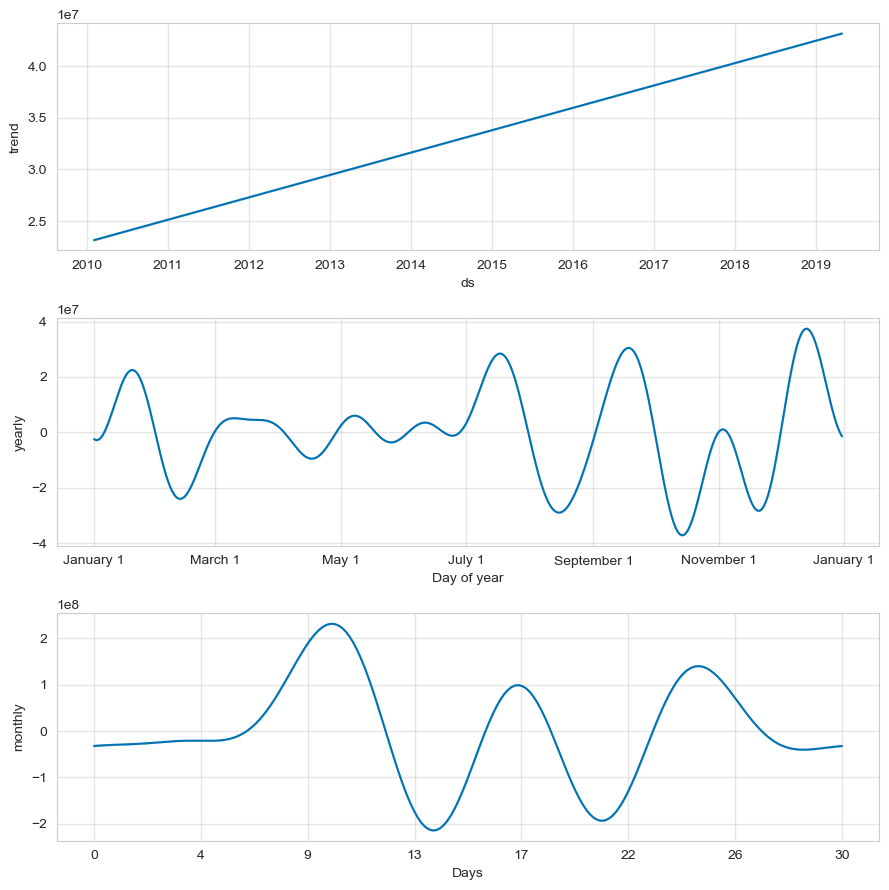

In [31]:
from prophet import Prophet

monthly_sales = data.groupby(data['Order Date'].dt.to_period('M')).agg({
    'Total Revenue': 'sum'
}).reset_index()

# Prophet requires columns 'ds' and 'y'
monthly_sales.columns = ['ds', 'y']
monthly_sales['ds'] = monthly_sales['ds'].dt.to_timestamp()

# Initialize and fit the model
model = Prophet(yearly_seasonality=True)
model.add_seasonality(name = 'monthly', period = 30.5,  fourier_order = 5)
model.fit(monthly_sales)

# Create a DataFrame to hold predictions (for the next 24 months)
future = model.make_future_dataframe(periods=24, freq='M')
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)
plt.title("Forecasted Monthly Sales Revenue")
plt.xlabel("Date")
plt.ylabel("Total Revenue ($)")
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()

### Summary

* **Data Overview:**
    
      The dataset contains information on sales transactions, including regions, countries, item types, sales channels, order dates, units sold, unit prices, costs, and financial metrics such as total revenue, total cost, and total profit.

* **Key Findings:**
    1. Yearly Sales Trends:

           2012 had the highest total revenue ($31.9 million) and total profit ($9.2 million), indicating a peak in sales and profitability.
           2010 also showed significant performance with a total revenue of $19.2 million and a profit of $6.6 million.
           The number of units sold was highest in 2012, reaching 97,967 units.
    2. Monthly Sales Trends:

           February emerged as the month with the highest total revenue ($24.7 million) and profit ($7.07 million), suggesting it might be a peak sales period, possibly due to seasonal or promotional activities.
           July also exhibited strong sales figures, indicating potential seasonality in sales.
    3. Year-Month Analysis:

           A detailed breakdown showed variability in sales across different months in different years, highlighting the importance of both yearly and monthly trends in understanding overall sales performance.

* **Modelling Approach**
    
    * Prophet Library: 
    
          Used for forecasting, Prophet handles seasonality and holiday effects well and is user-friendly for business users and data scientists alike.
    * Custom Seasonality :

          Although Prophet handles yearly seasonality by default, custom monthly seasonality was added to capture monthly variations in sales.

In [32]:
data.to_csv('amazon_sales_data1.csv', index=False)